# House Prediction Analysis

In [34]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

In [35]:
# Load dataset
tr = pd.read_csv('/Users/macuser/Documents/ITCS3162/house-prices-advanced-regression-techniques/train.csv')

## Pre-processing

In [36]:
tr.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
tr.shape

(1460, 81)

In [38]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [39]:
# Drop columns with too many nulls 
tr = tr.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [40]:
# Check for nulls
tr.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

In [41]:
for column in tr.columns:
    if tr[column].dtype == 'object':
        # For nominal variables, replace null values with "NA"
        tr[column].fillna("NA", inplace=True)
    else:
        # For ordinal variables, replace null values with 0
        tr[column].fillna(0, inplace=True)


In [42]:
# Check for duplicates
tr.duplicated().sum()

0

## Data Understanding & Visualization

In [43]:
tr.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [44]:
tr.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [45]:
tr['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

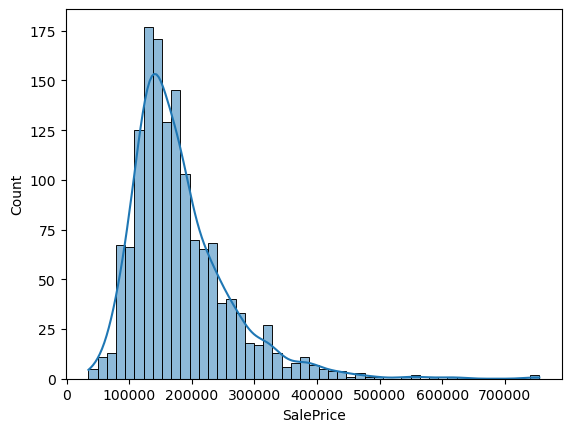

In [46]:
# Distribution of SalePrice
sns.histplot(data=tr, x='SalePrice', kde=True)

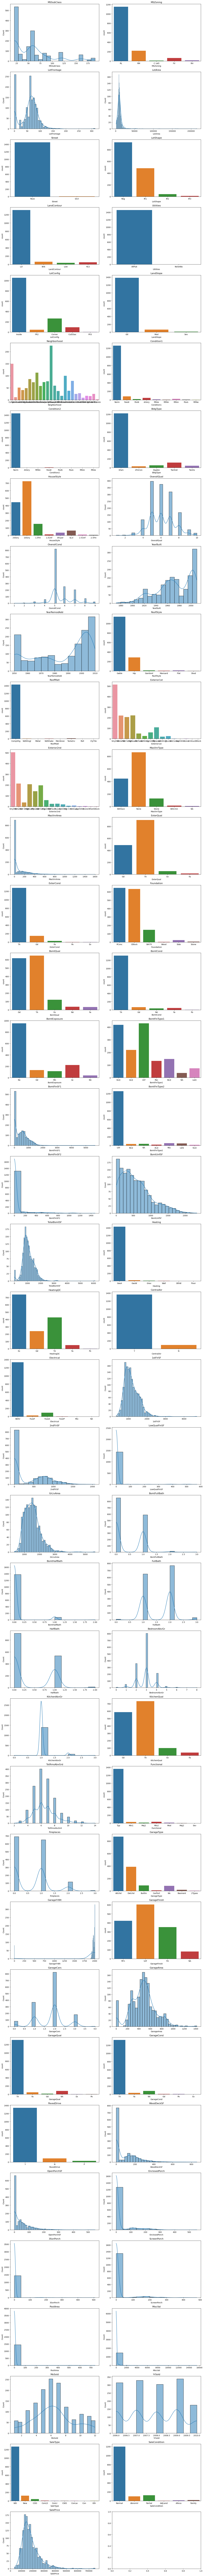

In [47]:
# Get the list of columns with categorical variables
categorical_columns = tr.select_dtypes(include=['object']).columns.tolist()

# Plot histograms for numeric variables and bar plots for categorical variables
fig, axes = plt.subplots(nrows=len(tr.columns)//2 + len(tr.columns) % 2, ncols=2, figsize=(15, 5 * len(tr.columns)//2 + 5 * len(tr.columns) % 2))

for i, column in enumerate(tr.columns):
    if column in categorical_columns:
        sns.countplot(data=tr, x=column, ax=axes[i//2, i%2])
        axes[i//2, i%2].set_title(column)
    else:
        sns.histplot(data=tr, x=column, ax=axes[i//2, i%2], kde=True)
        axes[i//2, i%2].set_title(column)

plt.tight_layout()
plt.show()

## Modeling

In [48]:
# Perform one-hot encoding for categorical variables
tr = pd.get_dummies(tr)

# Display the first few rows of the encoded DataFrame
tr.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


### Linear Regression dataset with outliers 

In [49]:
# Step 1: Split the data
X = tr.drop("SalePrice", axis=1)
y = tr["SalePrice"]

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit the model
reg = LinearRegression() 
reg.fit(X_train, y_train)

LinearRegression()

In [50]:
# Error/residual between actual values and predicted values
reg.score(X_test, y_test)

# Score() automates prediction of data using X_test and compares it with y_test 
# and by default uses the R-squared metric, so no need to manually derive y_pred. 
# But since we want RMSE, we will proceed manually

0.886195933299084

Root Mean Squared Error: 29545.12
Coefficient of determination: 0.886196


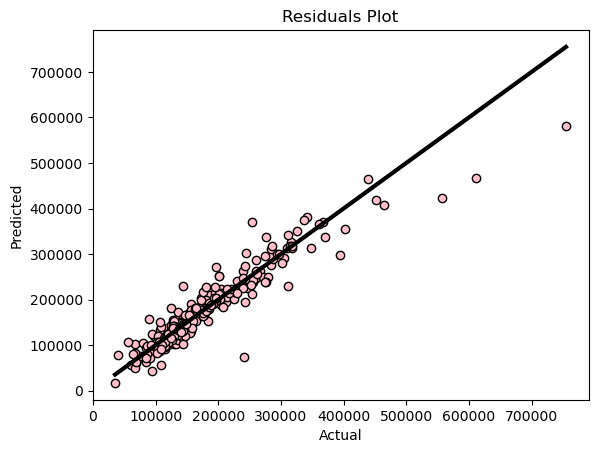

In [51]:
# Predict on X_test
y_pred = reg.predict(X_test)


# Evaluating the model- Coefficients 

# The root mean squared error:
# proportion of variance in response variable that is predictable from features
print('Root Mean Squared Error: %.2f'
      % mean_squared_error(y_test, y_pred, squared=False))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %f'
      % r2_score(y_test, y_pred))


# Plot outputs

# Actual vs Predicted
plt.scatter(y_test, y_pred, color='pink', edgecolors='black') 

# Diagonal line indicating perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linewidth=3)  

plt.title('Residuals Plot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Random Forest Regression dataset with outliers

In [52]:
# Call and fit the model
freg = RandomForestRegressor() 
freg.fit(X_train, y_train)

RandomForestRegressor()

Root Mean Squared Error: 28674.085906182365
R-squared: 0.8928072704672302


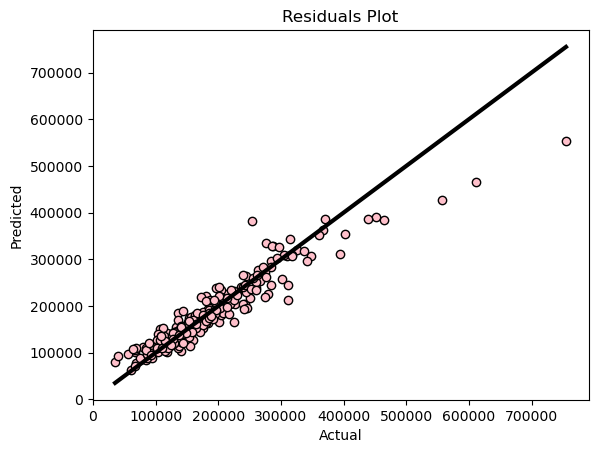

In [53]:
# Predict on X_test
y_pred = freg.predict(X_test)
 
    
# Evaluating the model- Coefficients 
    
# The root mean squared error:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')
 
# The coefficient of determination:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


# Plot outputs

plt.scatter(y_test, y_pred, color='pink', edgecolors='black') 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linewidth=3)  


plt.title('Residuals Plot')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

### Removing Outliers

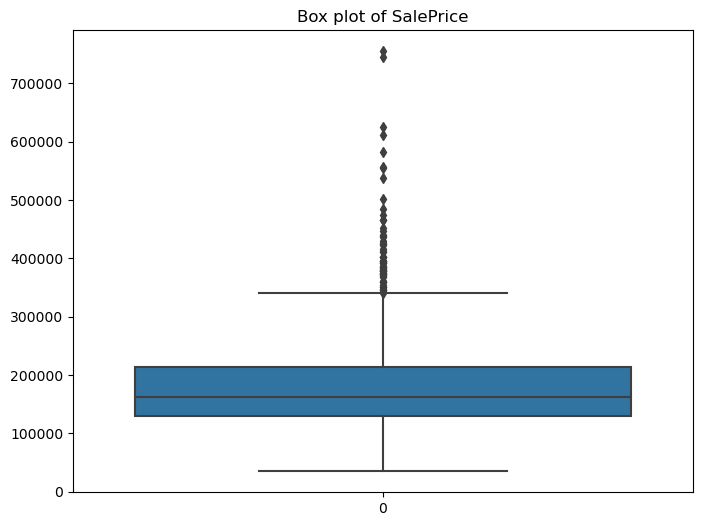

In [54]:
# Boxplot of SalPrice to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(tr['SalePrice'])
plt.title('Box plot of SalePrice')
plt.show()

In [55]:
# Calculate IQR
Q1 = tr['SalePrice'].quantile(0.25)
Q3 = tr['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = tr[(tr['SalePrice'] < lower_bound) | (tr['SalePrice'] > upper_bound)]

print("Number of outliers:", len(outliers))

Number of outliers: 61


In [56]:
# Filter out outliers
tr_no_outliers = tr[(tr['SalePrice'] >= lower_bound) & (tr['SalePrice'] <= upper_bound)]

# Check the shape of the DataFrame before and after removing outliers
print("Shape of tr before removing outliers:", tr.shape)
print("Shape of tr after removing outliers:", tr_no_outliers.shape)

Shape of tr before removing outliers: (1460, 282)
Shape of tr after removing outliers: (1399, 282)


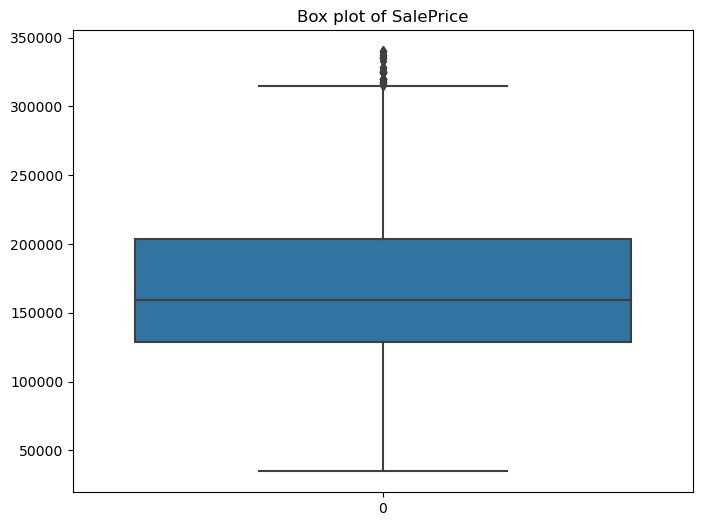

In [57]:
# Boxplot to visualize SalePrice after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(tr_no_outliers['SalePrice'])
plt.title('Box plot of SalePrice')
plt.show()

<Axes: xlabel='SalePrice', ylabel='Count'>

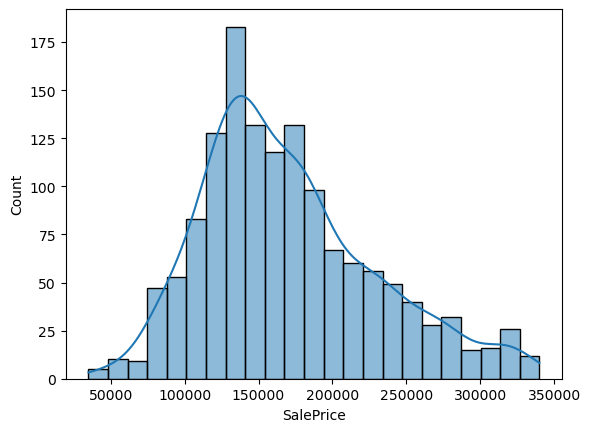

In [60]:
# Distribution of SalePrice without outliers
sns.histplot(data=tr_no_outliers, x='SalePrice', kde=True)

### Linear Regression on dataset after removing outliers 

In [25]:
# Step 1: Split the data
X = tr_no_outliers.drop("SalePrice", axis=1)
y = tr_no_outliers["SalePrice"]

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit the model
reg.fit(X_train, y_train)

LinearRegression()

Root Mean Squared Error: 20637.97
Coefficient of determination: 0.866095


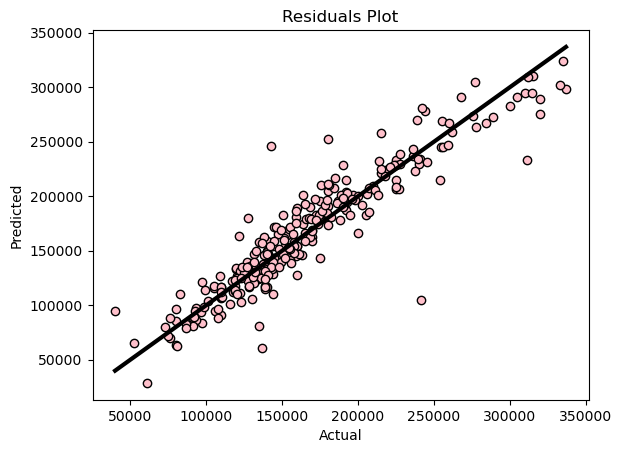

In [26]:
# Predict on X_test
y_pred = reg.predict(X_test)


# Evaluating the model- Coefficients 

# The root mean squared error:
# proportion of variance in response variable that is predictable from features
print('Root Mean Squared Error: %.2f'
      % mean_squared_error(y_test, y_pred, squared=False))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %f'
      % r2_score(y_test, y_pred))


# Plot outputs

# Actual vs Predicted
plt.scatter(y_test, y_pred, color='pink', edgecolors='black') 

# Diagonal line indicating perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linewidth=3)  

plt.title('Residuals Plot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [27]:
freg.fit(X_train, y_train)

RandomForestRegressor()

Root Mean Squared Error: 20352.295931994704
R-squared: 0.8697768850157621


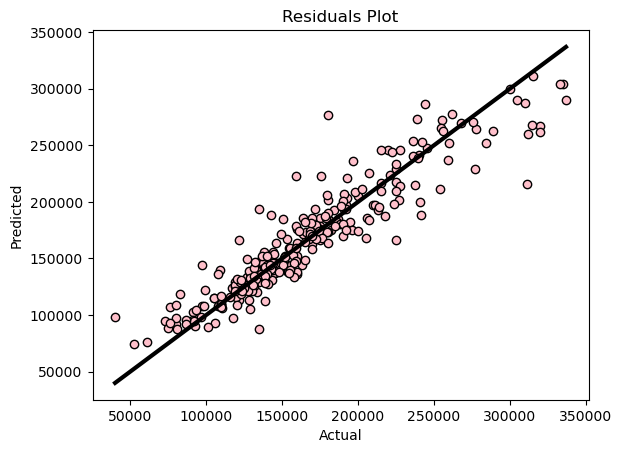

In [28]:
# Predict on X_test
y_pred = freg.predict(X_test)
 
    
# Evaluating the model- Coefficients 
    
# The root mean squared error:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')
 
# The coefficient of determination:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


# Plot outputs

plt.scatter(y_test, y_pred, color='pink', edgecolors='black') 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linewidth=3)  


plt.title('Residuals Plot')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()